In [21]:
# Import all necessary libraries.
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydot
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns

In [23]:
centers = [[-5, 0], [0, 1.5], [5, -1]]
x, y = make_blobs(n_samples=1000, centers=centers, random_state=42)

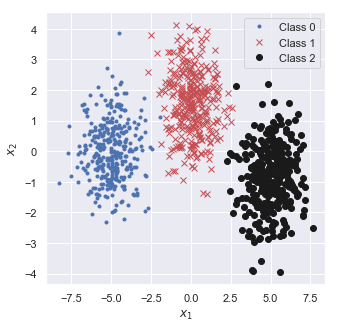

In [24]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], '.', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'rx', label='Class 1')
plt.plot(x[idx2,0], x[idx2,1], 'ko', label='Class 2')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('classes.png', dpi=600)
plt.show()

In [25]:
# Split data into train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier on the training features and labels.
clf.fit(x_train, y_train)

# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate and return the accuracy on the test data 
accuracy = accuracy_score(y_test, y_pred)

print('accuracy: ',accuracy)

accuracy:  0.995


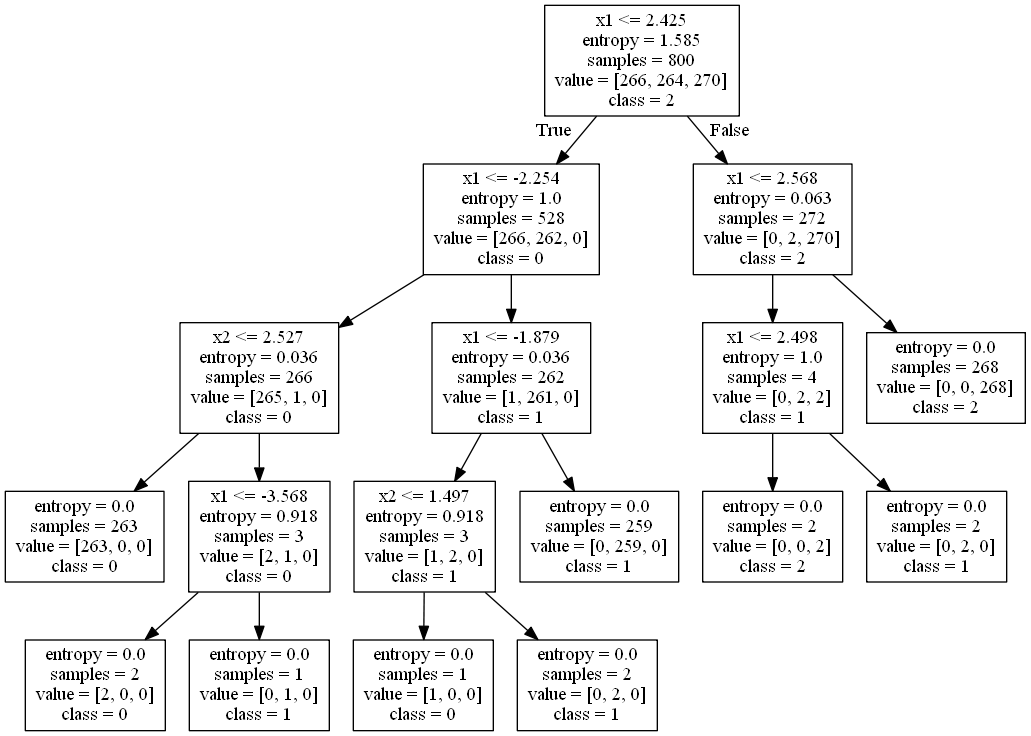

In [18]:
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1','2'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

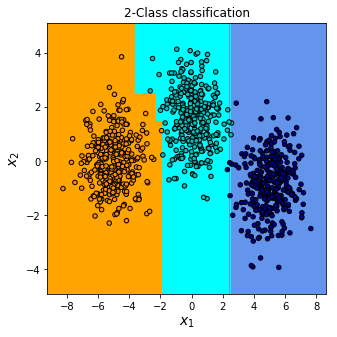

In [14]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("3-Class classification")

plt.show()

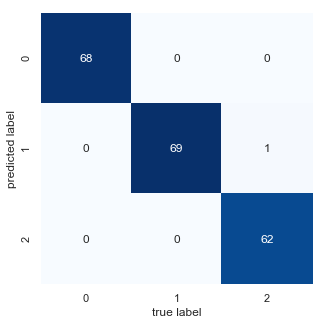

In [20]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1','2'], yticklabels=['0','1','2'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [19]:
# Print classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       0.99      1.00      0.99        69
           2       1.00      0.98      0.99        63

   micro avg       0.99      0.99      0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200

